<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## RNN many-to-one

#### Datos
El objecto es utilizar una serie de sucuencias númericas (datos sintéticos) para poner a prueba el uso de las redes RNN. Este ejemplo se inspiró en otro artículo, lo tienen como referencia en el siguiente link:\
[LINK](https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras/)

In [1]:
import re

import numpy as np
import pandas as pd

from keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate
from keras.layers import Bidirectional

In [2]:
# Generar datos sintéticos
X = list()
y = list()

# X será una lista de 1 a 45 agrupado de a 3 números consecutivos
# [ [1, 2, 3], [4, 5, 6], ....]
X = [ [x, x+1, x+2] for x in range(1, 46, 3)]

# "y" (target) se obtiene como la suma de cada grupo de 3 números de entrada
y = [sum(x) for x in X]

print("datos X:", X)
print("datos y:", y)

datos X: [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18], [19, 20, 21], [22, 23, 24], [25, 26, 27], [28, 29, 30], [31, 32, 33], [34, 35, 36], [37, 38, 39], [40, 41, 42], [43, 44, 45]]
datos y: [6, 15, 24, 33, 42, 51, 60, 69, 78, 87, 96, 105, 114, 123, 132]


In [3]:
# Cada dato X lo transformarmos en una matriz de 1 fila 1 columna (1x1)
X = np.array(X).reshape(len(X), len(X[0]), 1)
print("datos X:", X)

datos X: [[[ 1]
  [ 2]
  [ 3]]

 [[ 4]
  [ 5]
  [ 6]]

 [[ 7]
  [ 8]
  [ 9]]

 [[10]
  [11]
  [12]]

 [[13]
  [14]
  [15]]

 [[16]
  [17]
  [18]]

 [[19]
  [20]
  [21]]

 [[22]
  [23]
  [24]]

 [[25]
  [26]
  [27]]

 [[28]
  [29]
  [30]]

 [[31]
  [32]
  [33]]

 [[34]
  [35]
  [36]]

 [[37]
  [38]
  [39]]

 [[40]
  [41]
  [42]]

 [[43]
  [44]
  [45]]]


In [4]:
y = np.asanyarray(y)
y.shape

(15,)

### 2 - Entrenar el modelo

In [5]:
input_shape = X[0].shape
input_shape

(3, 1)

In [6]:
output_shape = 1
output_shape

1

In [7]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=input_shape))
model.add(Dense(output_shape))
model.compile(loss='mse',
              optimizer="Adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
hist = model.fit(X, y, epochs=500, validation_split=0.2, batch_size=5)

Epoch 1/500
3/3 [==============================] - 2s 151ms/step - loss: 3801.8328 - val_loss: 13973.6436
Epoch 2/500
3/3 [==============================] - 0s 17ms/step - loss: 3730.0869 - val_loss: 13714.9736
Epoch 3/500
3/3 [==============================] - 0s 17ms/step - loss: 3655.6770 - val_loss: 13444.7178
Epoch 4/500
3/3 [==============================] - 0s 18ms/step - loss: 3576.3816 - val_loss: 13143.3984
Epoch 5/500
3/3 [==============================] - 0s 20ms/step - loss: 3491.7361 - val_loss: 12796.4814
Epoch 6/500
3/3 [==============================] - 0s 15ms/step - loss: 3395.5459 - val_loss: 12398.5156
Epoch 7/500
3/3 [==============================] - 0s 19ms/step - loss: 3264.3330 - val_loss: 11956.0205
Epoch 8/500
3/3 [==============================] - 0s 16ms/step - loss: 3133.6960 - val_loss: 11389.0703
Epoch 9/500
3/3 [==============================] - 0s 16ms/step - loss: 2985.5164 - val_loss: 10651.8213
Epoch 10/500
3/3 [==============================] - 0s

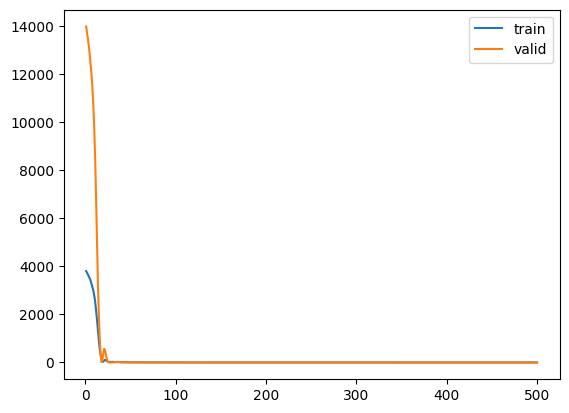

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['loss']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['loss'], label='train')
sns.lineplot(x=epoch_count,  y=hist.history['val_loss'], label='valid')
plt.show()

In [10]:
# Ensayo
x_test = [50, 51, 52]
y_test = sum(x_test)
test_input = np.array([x_test])
test_input = test_input.reshape((1, len(x_test), 1))
y_hat = model.predict(test_input, verbose=0)[0][0]

print("y_test:", y_test)
print("y_hat:", y_hat)

model.evaluate(test_input, np.array([y_test]))

y_test: 153
y_hat: 152.5688
1/1 [==============================] - 0s 25ms/step - loss: 0.1859


0.18593181669712067

### 3 - Bidirectional RNN (BRNN)

In [11]:
# En esta oportunidad se utilizará Bidirectional, dentro se especifica
# que lo que se desea hacer bidireccional es una capa LSTM

# En el summary se puede observar que la cantidad de parámetros
# de nuestor nueva capa LSTM bidireccional es el doble que la anterior

model2 = Sequential()
model2.add(Bidirectional(LSTM(64, activation='relu'), input_shape=input_shape))
model2.add(Dense(output_shape))
model2.compile(loss='mse',
              optimizer="Adam")

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 128)               33792     
 al)                                                             
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33921 (132.50 KB)
Trainable params: 33921 (132.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
hist2 = model2.fit(X, y, epochs=500, validation_split=0.2, batch_size=5)

Epoch 1/500
3/3 [==============================] - 3s 251ms/step - loss: 4043.2976 - val_loss: 14870.8857
Epoch 2/500
3/3 [==============================] - 0s 24ms/step - loss: 3907.2148 - val_loss: 14311.6104
Epoch 3/500
3/3 [==============================] - 0s 19ms/step - loss: 3755.3313 - val_loss: 13816.1484
Epoch 4/500
3/3 [==============================] - 0s 20ms/step - loss: 3631.6101 - val_loss: 13281.0273
Epoch 5/500
3/3 [==============================] - 0s 17ms/step - loss: 3479.4431 - val_loss: 12694.0010
Epoch 6/500
3/3 [==============================] - 0s 18ms/step - loss: 3329.3916 - val_loss: 12022.5928
Epoch 7/500
3/3 [==============================] - 0s 17ms/step - loss: 3147.4453 - val_loss: 11246.1826
Epoch 8/500
3/3 [==============================] - 0s 18ms/step - loss: 2953.4006 - val_loss: 10330.1846
Epoch 9/500
3/3 [==============================] - 0s 16ms/step - loss: 2679.1631 - val_loss: 9240.2334
Epoch 10/500
3/3 [==============================] - 0s 

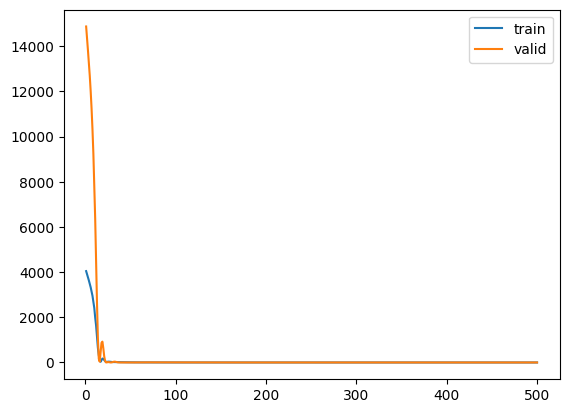

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist2.history['loss']) + 1)
sns.lineplot(x=epoch_count,  y=hist2.history['loss'], label='train')
sns.lineplot(x=epoch_count,  y=hist2.history['val_loss'], label='valid')
plt.show()

In [14]:
# Ensayo
x_test = [50, 51, 52]
y_test = sum(x_test)
test_input = np.array([x_test])
test_input = test_input.reshape((1, len(x_test), 1))
y_hat = model2.predict(test_input, verbose=0)[0][0]

print("y_test:", y_test)
print("y_hat:", y_hat)

model2.evaluate(test_input, np.array([y_test]))

y_test: 153
y_hat: 152.37491
1/1 [==============================] - 0s 21ms/step - loss: 0.3908


0.390777587890625

### 4 - Conclusión
Implementar un modelo bidireccional basado en RNN (en este caso LSTM) es muy sensillo. En este ejemplo no se explotó su potencialidad pero queda como nota de como implementar una capa BRNN.